# Влияние условий жизни учащихся в возрасте от 15 до 22 лет на успеваемость по математике

Курс DST-PRO \
Поток DSPR-56

Проект 2. Разведывательный анализ данных > 2.8. Итоговое задание

---

## Суть проекта
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

[Датасет проекта](./stud_math.csv).


## Задачи по выполнению проекта
1. Провести первичную обработку данных. Так как данных много, нужно написать функции, которые можно применять к столбцам определённого типа.
2. Посмотреть на распределение признака для числовых переменных, устранить выбросы.
3. Оценить количество уникальных значений для номинативных переменных.
4. По необходимости преобразовать данные.
5. Провести корреляционный анализ количественных переменных.
6. Отобрать не коррелирующие переменные.
7. Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Сформулировать выводы относительно качества данных и переменных, которые будут использованы для построения модели.

# 1. Первичная обработка данных

Импортируем необходимые библиотеки и загрузим данные:

In [1]:
from IPython.display import Markdown, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

import warnings
warnings.simplefilter('ignore')


pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('./stud_math.csv')


def printmd(string):
    display(Markdown(string))

In [2]:
printmd('## Описание датасета\n \
\n\
Переменные, которые содержит датасет:')

# Словарь с описаниями полей
descriptions = {
    "school": {"description": "аббревиатура школы, в которой учится ученик", "bounds": []},
    "sex": {"description": "пол ученика (`'F'` - женский, `'M'` - мужской)", "bounds": []},
    "age": {"description": "возраст ученика (от `15` до `22`)", "bounds": [15, 22]},
    "address": {"description": "тип адреса ученика (`'U'` - городской, `'R'` - за городом)", "bounds": []},
    "famsize": {"description": "размер семьи(`'LE3'` <= 3, `'GT3'` > 3)", "bounds": []},
    "Pstatus": {"description": "статус совместного жилья родителей (`'T'` - живут вместе, `'A'` - раздельно)", "bounds": []},
    "Medu": {"description": "образование матери (`0` - нет, `1` - 4 класса, `2` - 5-9 классы, `3` - среднее специальное или 11 классов, `4` - высшее)", "bounds": [0, 4]},
    "Fedu": {"description": "образование отца (`0` - нет, `1` - 4 класса, `2` - 5-9 классы, `3` - среднее специальное или 11 классов, `4` - высшее)", "bounds": [0, 4]},
    "Mjob": {"description": "работа матери (`'teacher'` - учитель, `'health'` - сфера здравоохранения, `'services'` - гос служба, `'at_home'` - не работает, `'other'` - другое)", "bounds": []},
    "Fjob": {"description": "работа отца (`'teacher'` - учитель, `'health'` - сфера здравоохранения, `'services'` - гос служба, `'at_home'` - не работает, `'other'` - другое)", "bounds": []},
    "reason": {"description": "причина выбора школы (`'home'` - близость к дому, `'reputation'` - репутация школы, `'course'` - образовательная программа, `'other'` - другое)", "bounds": []},
    "guardian": {"description": "опекун (`'mother'` - мать, `'father'` - отец, `'other'` - другое)", "bounds": []},
    "traveltime": {"description": "время в пути до школы (`1` - <15 мин., `2` - 15-30 мин., `3` - 30-60 мин., `4` - >60 мин.)", "bounds": [1, 4]},
    "studytime": {"description": "время на учёбу помимо школы в неделю (`1` - <2 часов, `2` - 2-5 часов, `3` - 5-10 часов, `4` - >10 часов)", "bounds": [1, 4]},
    "failures": {"description": "количество внеучебных неудач (`n`, если `1 <= n <= 3`, иначе `0`)", "bounds": [0, 3]},
    "schoolsup": {"description": "дополнительная образовательная поддержка (`yes` или `no`)", "bounds": []},
    "famsup": {"description": "семейная образовательная поддержка (`yes` или `no`)", "bounds": []},
    "paid": {"description": "дополнительные платные занятия по математике (`yes` или `no`)", "bounds": []},
    "activities": {"description": "дополнительные внеучебные занятия (`yes` или `no`)", "bounds": []},
    "nursery": {"description": "посещал детский сад (`yes` или `no`)", "bounds": []},
    "higher": {"description": "хочет получить высшее образование (`yes` или `no`)", "bounds": []},
    "internet": {"description": "наличие интернета дома (`yes` или `no`)", "bounds": []},
    "romantic": {"description": "в романтических отношениях (`yes` или `no`)", "bounds": []},
    "famrel": {"description": "семейные отношения (от `1` - очень плохо до `5` - очень хорошо)", "bounds": [1, 5]},
    "freetime": {"description": "свободное время после школы (от `1` - очень мало до `5` - очень много)", "bounds": [1, 5]},
    "goout": {"description": "проведение времени с друзьями (от `1` - очень мало до `5` - очень много)", "bounds": [1, 5]},
    "health": {"description": "текущее состояние здоровья (от `1` - очень плохо до `5` - очень хорошо)", "bounds": [1, 5]},
    "absences": {"description": "количество пропущенных занятий", "bounds": []},
    "score": {"description": "баллы по госэкзамену по математике", "bounds": []},
}

for i, x in enumerate(descriptions.keys()):
    d = descriptions[x]['description']
    printmd(f'{i+1}. `{x}` — {d}\n')
        
        

## Описание датасета
 
Переменные, которые содержит датасет:

1. `school` — аббревиатура школы, в которой учится ученик


2. `sex` — пол ученика (`'F'` - женский, `'M'` - мужской)


3. `age` — возраст ученика (от `15` до `22`)


4. `address` — тип адреса ученика (`'U'` - городской, `'R'` - за городом)


5. `famsize` — размер семьи(`'LE3'` <= 3, `'GT3'` > 3)


6. `Pstatus` — статус совместного жилья родителей (`'T'` - живут вместе, `'A'` - раздельно)


7. `Medu` — образование матери (`0` - нет, `1` - 4 класса, `2` - 5-9 классы, `3` - среднее специальное или 11 классов, `4` - высшее)


8. `Fedu` — образование отца (`0` - нет, `1` - 4 класса, `2` - 5-9 классы, `3` - среднее специальное или 11 классов, `4` - высшее)


9. `Mjob` — работа матери (`'teacher'` - учитель, `'health'` - сфера здравоохранения, `'services'` - гос служба, `'at_home'` - не работает, `'other'` - другое)


10. `Fjob` — работа отца (`'teacher'` - учитель, `'health'` - сфера здравоохранения, `'services'` - гос служба, `'at_home'` - не работает, `'other'` - другое)


11. `reason` — причина выбора школы (`'home'` - близость к дому, `'reputation'` - репутация школы, `'course'` - образовательная программа, `'other'` - другое)


12. `guardian` — опекун (`'mother'` - мать, `'father'` - отец, `'other'` - другое)


13. `traveltime` — время в пути до школы (`1` - <15 мин., `2` - 15-30 мин., `3` - 30-60 мин., `4` - >60 мин.)


14. `studytime` — время на учёбу помимо школы в неделю (`1` - <2 часов, `2` - 2-5 часов, `3` - 5-10 часов, `4` - >10 часов)


15. `failures` — количество внеучебных неудач (`n`, если `1 <= n <= 3`, иначе `0`)


16. `schoolsup` — дополнительная образовательная поддержка (`yes` или `no`)


17. `famsup` — семейная образовательная поддержка (`yes` или `no`)


18. `paid` — дополнительные платные занятия по математике (`yes` или `no`)


19. `activities` — дополнительные внеучебные занятия (`yes` или `no`)


20. `nursery` — посещал детский сад (`yes` или `no`)


21. `higher` — хочет получить высшее образование (`yes` или `no`)


22. `internet` — наличие интернета дома (`yes` или `no`)


23. `romantic` — в романтических отношениях (`yes` или `no`)


24. `famrel` — семейные отношения (от `1` - очень плохо до `5` - очень хорошо)


25. `freetime` — свободное время после школы (от `1` - очень мало до `5` - очень много)


26. `goout` — проведение времени с друзьями (от `1` - очень мало до `5` - очень много)


27. `health` — текущее состояние здоровья (от `1` - очень плохо до `5` - очень хорошо)


28. `absences` — количество пропущенных занятий


29. `score` — баллы по госэкзамену по математике


## Первичный осмотр данных

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [3]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В датасете **13** числовых и **17** строковых колонок. \
Всего **395** строк! \
Имеется неизвестное нам поле `'studytime, granular'`, по нему никакой информации нет, что это за данные гадать не будет, просто удалим.

### Распеделение пропусков по всему датасету

In [4]:
#plt.figure(figsize=(20, 14))  # размер тепловой карты
#sns.heatmap(stud.isnull(), cmap="YlGnBu", annot=True)

#### Вывод
Много пропусков распределённых по всему датасету, концентрации не наблюдается, удаление не нужно.

### Таблица максимальных пропусков в стобцах

In [5]:
count_rows = stud.apply(lambda x: sum(x.isnull()), axis=1).value_counts()
percent_nans = round(pd.Series(
    count_rows.index/stud.shape[1]*100)).sort_values(ascending=False).astype(str)+' %'
misses = max(stud.apply(lambda x: sum(x.isnull()), axis=1))/stud.shape[1]
print('Максимум незаполненных строк в датафрейме:', round(misses*100, 2), "%")
pd.DataFrame({'Количество случаев в строке': count_rows,
              'Количество пропусков в строке': count_rows.index,
              'Процент незаполненных значений в строке': percent_nans}).sort_values(
    'Количество пропусков в строке', ascending=False).reset_index().drop('index', axis=1)

Максимум незаполненных строк в датафрейме: 20.0 %


,Количество случаев в строке,Количество пропусков в строке,Процент незаполненных значений в строке
0,2,6,20.0 %
1,5,5,17.0 %
2,15,4,13.0 %
3,47,3,10.0 %
4,131,2,7.0 %
5,97,1,3.0 %
6,98,0,0.0 %


# 2. Первичный анализ данных в колонках

Удалим столбец `'studytime, granular'`.

In [6]:
stud.drop(['studytime, granular'], inplace=True, axis=1)
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

Есть ли дубликаты строк? \

In [7]:
if not stud.duplicated().any():  # .any() думаю подойдёт для этого
    print('Нет дубликатов.')
else:
    print('Есть дубликаты! Удаляем ...')
    stud.drop_duplicates()

Нет дубликатов.


Сразу удалили дубликаты, если они были.

#### Немножко абстракции с переходом к саморефлексии :)

(Научили меня саморефлексироваться на мою голову.)

Для более качественного анализа, недостаточно рассмотреть каждый столбец отдельно, нужно сформировать общее представление о всём датасете.

Общее представление придёт после разбора каждого столбца. А там, далее, можно и выявить то что требуется, возможно и не потребуется анализировать все данные, если только для проверки предположения. Но, для итогового проекта всё же нужно рассмотреть все столбцы, чтобы показать ментору свою способность или не способность к анализу данных, и выставления "корректных" баллов за показанные умения, а может не умения :innocent:

Поэтому, для начала, всё же рассмотрим каждый столбец отдельно :)

Сначала начнём с числовых данных. Просто посмотрим числовые данные в соответствующих колонках. Попробуем выявить некие нестыковки, если они есть.

Ах да, забегая вперёд, скажу, что, всякие `yes` и `no` можно заменить на `1` и `0`, если понадобится, хотя можно и так обрабатывать. Опыта в EDA пока мало, поэтому по ходу дела посмотрю. Но, по опыту хранения и обработки данных, могу сказать, что, гораздо удобнее когда все подобные данные в числовом виде и имеют тип byte. Так что сверю свои предположения по ходу выполнения данного проекта. Да, да, я подхожу к делу более основательно, могу и запороть все сроки сдачи к дедлайну или как там оно сказать :wink:

Вообще, должен быть качественный сбор данных, чтобы не пришлось возиться с такой ерундой как пропуски, опечатки, дублирование строк и прочей ерундой. Т.е. выявлять корректность данных до занесения в базу данных. Я буду бороться с этим, ибо лень каждый раз заниматься монотонной ерундой :angry:

А знаете что? А запилим ка функцию )

## Вспомогательные функции

In [8]:
low, high = None, None


def first_look(df: pd.DataFrame, column: object):
    """ Первичный осмотр данных """

    global low, high
    bounds = descriptions[column]['bounds']

    printmd(f'## {column}')
    if column in list(descriptions.keys()):
        printmd(descriptions[column]['description'])

    if df.loc[:, col].dtypes == np.dtype('O'):
        # Обработка строковых данных

        # График
        fig, ax = plt.subplots(figsize=(6, 5))
        sns.countplot(df.loc[:, column], ax=ax)
        plt.show()
    else:
        # Подготовка графика числовых данных
        plot_df = pd.DataFrame({'Распределение': df[column]})

        # Ошибки
        if search_mistakes(df, column):
            # if len(bounds) == 2:
            #    low, high = bounds[0], bounds[1]
            plot_df['Распределение в диапазоне границ'] = df.loc[
                df.loc[:, column].between(low, high)][column]

        # График
        fig, ax = plt.subplots(figsize=(7 * plot_df.shape[1], 4))
        plot_df.hist(ax=ax)
        plt.show()

    # Пропуски
    misses = (1 - (df[column].count() / df.shape[0]))
    if misses > 0:
        printmd('#### Обнаружены пропуски')
        print('Всего пропусков: ', df.shape[0] -
              df[column].count(), '-', round(misses*100, 2), "%")
        if df.loc[:, col].dtypes == np.dtype('O'):
            out_df = stud.loc[~pd.notnull(stud.loc[:, column])]
        else:
            out_df = stud[np.isnan(stud[column])]
        if out_df.shape[0] > 5:
            print('Первые 5:')
        display(out_df[:5])


def search_mistakes(df: pd.DataFrame, column: object) -> bool:
    """ Функция проверяет переменные на наличие ошибок в данных """

    global low, high
    bounds = descriptions[column]['bounds']

    if len(bounds) == 2:
        low, high = bounds[0], bounds[1]
        if df[column].min() < low or df[column].max() > high:
            out_df = stud.loc[(~stud.loc[:, column].between(
                low, high)) & pd.notnull(stud.loc[:, column])]
            printmd('#### Есть ошибки!')
            print(
                'Обнаружены данные вне предела обозначенного диапазона в количестве строк: ', out_df.shape[0])
            if out_df.shape[0] > 5:
                print('\nПервые 5:')
            display(out_df[:5])
            return True
        else:
            printmd('#### Ошибок нет\nВсе данные в пределах обозначенного диапазона')
    else:
        low, high = IQR_outlier(df, column, verbose=False)
        if df[column].min() < low or df[column].max() > high:
            out_df = stud.loc[(~stud.loc[:, column].between(
                low, high)) & pd.notnull(stud.loc[:, column])]
            printmd('#### Обнаружены выбросы')
            print('Найдены выбросы по IQR в количестве: ', out_df.shape[0])
            if out_df.shape[0] > 5:
                print('\nПервые 5:')
            display(out_df[:5])
            return True
        else:
            print('Выбросов нет')


def IQR_outlier(df: pd.DataFrame, column: object, verbose: bool = True) -> tuple:
    """ Функция для отображения границ межквартильного размаха """
    global low, high
    perc25 = df[column].quantile(q=0.25, interpolation='midpoint')
    perc75 = df[column].quantile(q=0.75, interpolation='midpoint')
    IQR = perc75 - perc25
    low = perc25 - 1.5*IQR
    high = perc75 + 1.5*IQR
    if verbose:
        print('',
              f'25-й перцентиль: {perc25}\n',
              f'75-й перцентиль: {perc75}\n',
              f"IQR: {IQR}\n",
              f"Границы выбросов: [{low}, {high}]"
              )
    return (low, high)


def get_boxplot(df: pd.DataFrame, column: object, ax_y='score') -> None:
    """ Функция для отображения boxplot-графиков для номинативных и смешанных переменных """
    fig, ax = plt.subplots(figsize=(8, 4))
    box_plot = sns.boxplot(x=column, y=ax_y, data=df, ax=ax)
    cnt = df[column].value_counts()
    medians = stud.groupby([column])[ax_y].median()
    vertical_offset = stud.groupby([column])[ax_y].median() * 0.12
    x = stud[column].unique()
    x = list(filter(lambda v: v == v, x))
    if df.loc[:, col].dtypes != np.dtype('O'):
        x = sorted(x)
    for xtick, ytick in zip(list(box_plot.get_xticks()), x):
        box_plot.text(xtick, medians.loc[ytick]-vertical_offset[ytick], cnt.loc[ytick],
                      horizontalalignment='center', size=15, color='w', weight='semibold')
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

### Описание вспомогательных функций

Функция `first_look` осуществляет проверку данных в зависимости от типа переменных.

Если это числовые значения, то с помощью функции `search_mistakes` проверяет входят ли данные в заданный диапазон допустимых значений. Далее выводится график с распределением данных. Если данные выходят за пределы допустимого, то выводится второй график более корректный, исключая данные вне допустимого диапазона. Далее определяет наличие пропусков, и выводит их.

Если это строковые данные, то выводится график со всеми возможными строковыми значениями. Отображает данные с пропусками, если они присутствуют. \

Функция `IQR_outlier` вычисляет межквартильных размах и возвращает наименьшее и наибольшее значения заданной колонки.

Функция `get_boxplot` формирует и отображает boxplot-графики для номинативных и смешанных переменных по заданной колонке.

## Анализ числовых данных

## age

возраст ученика (от `15` до `22`)

#### Ошибок нет
Все данные в пределах обозначенного диапазона

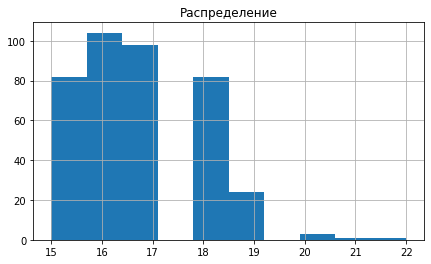

---

## Medu

образование матери (`0` - нет, `1` - 4 класса, `2` - 5-9 классы, `3` - среднее специальное или 11 классов, `4` - высшее)

#### Ошибок нет
Все данные в пределах обозначенного диапазона

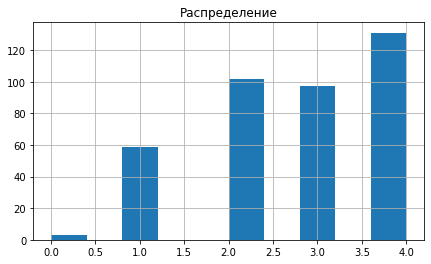

#### Обнаружены пропуски

Всего пропусков:  3 - 0.76 %


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,NaN,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,NaN,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


---

## Fedu

образование отца (`0` - нет, `1` - 4 класса, `2` - 5-9 классы, `3` - среднее специальное или 11 классов, `4` - высшее)

#### Есть ошибки!

Обнаружены данные вне предела обозначенного диапазона в количестве строк:  1


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


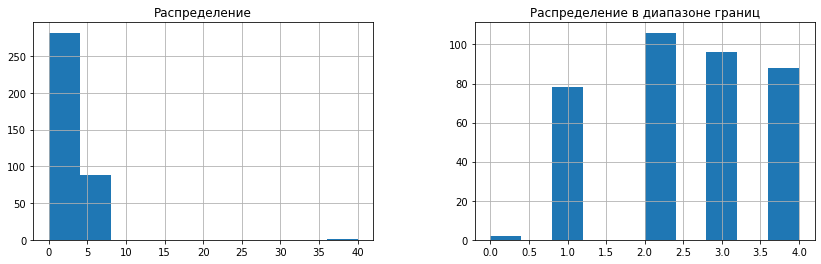

#### Обнаружены пропуски

Всего пропусков:  24 - 6.08 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0


---

## traveltime

время в пути до школы (`1` - <15 мин., `2` - 15-30 мин., `3` - 30-60 мин., `4` - >60 мин.)

#### Ошибок нет
Все данные в пределах обозначенного диапазона

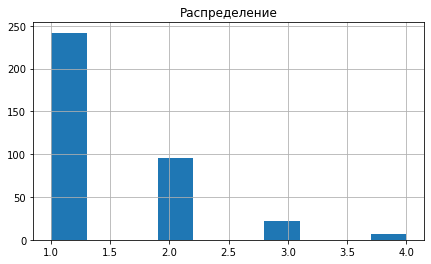

#### Обнаружены пропуски

Всего пропусков:  28 - 7.09 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0


---

## studytime

время на учёбу помимо школы в неделю (`1` - <2 часов, `2` - 2-5 часов, `3` - 5-10 часов, `4` - >10 часов)

#### Ошибок нет
Все данные в пределах обозначенного диапазона

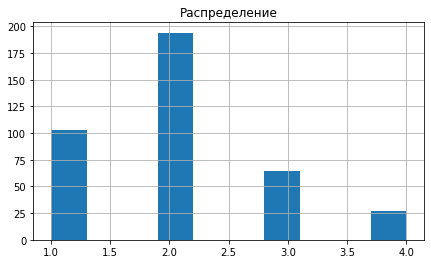

#### Обнаружены пропуски

Всего пропусков:  7 - 1.77 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0


---

## failures

количество внеучебных неудач (`n`, если `1 <= n <= 3`, иначе `0`)

#### Ошибок нет
Все данные в пределах обозначенного диапазона

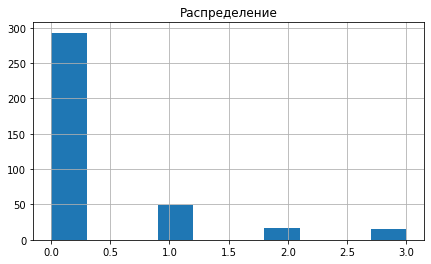

#### Обнаружены пропуски

Всего пропусков:  22 - 5.57 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0


---

## famrel

семейные отношения (от `1` - очень плохо до `5` - очень хорошо)

#### Есть ошибки!

Обнаружены данные вне предела обозначенного диапазона в количестве строк:  1


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


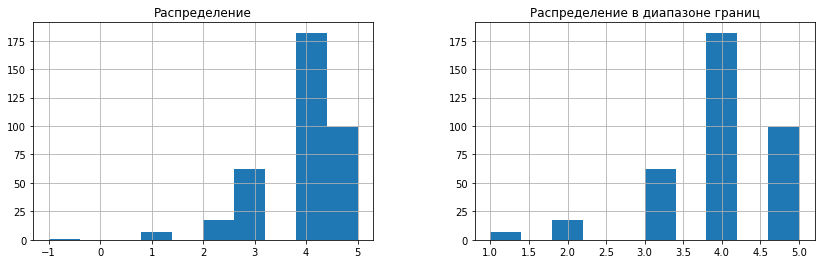

#### Обнаружены пропуски

Всего пропусков:  27 - 6.84 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
72,GP,F,15,R,GT3,T,1.0,1.0,other,other,reputation,mother,1.0,2.0,2.0,yes,yes,no,no,no,yes,yes,yes,NaN,3.0,4.0,5.0,2.0,25.0


---

## freetime

свободное время после школы (от `1` - очень мало до `5` - очень много)

#### Ошибок нет
Все данные в пределах обозначенного диапазона

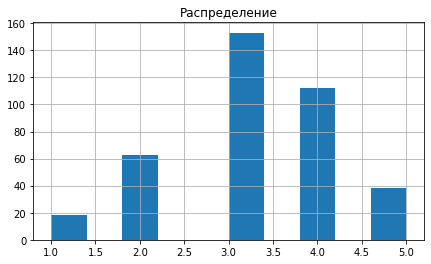

#### Обнаружены пропуски

Всего пропусков:  11 - 2.78 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
280,GP,M,17,U,NaN,A,4.0,NaN,services,other,home,mother,2.0,1.0,NaN,no,no,yes,yes,yes,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0


---

## goout

проведение времени с друзьями (от `1` - очень мало до `5` - очень много)

#### Ошибок нет
Все данные в пределах обозначенного диапазона

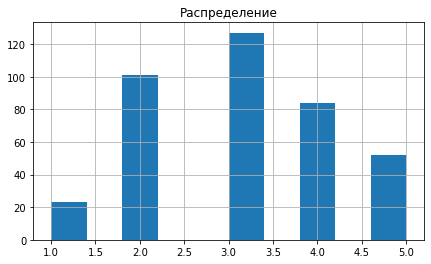

#### Обнаружены пропуски

Всего пропусков:  8 - 2.03 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
200,GP,F,16,U,GT3,T,4.0,3.0,health,other,home,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,4.0,3.0,NaN,2.0,2.0,80.0
202,GP,F,17,U,NaN,T,1.0,1.0,other,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,no,no,4.0,4.0,NaN,1.0,4.0,50.0
221,GP,F,17,U,NaN,T,1.0,1.0,at_home,other,reputation,mother,1.0,3.0,1.0,no,yes,no,yes,yes,yes,no,yes,4.0,3.0,NaN,5.0,0.0,0.0


---

## health

текущее состояние здоровья (от `1` - очень плохо до `5` - очень хорошо)

#### Ошибок нет
Все данные в пределах обозначенного диапазона

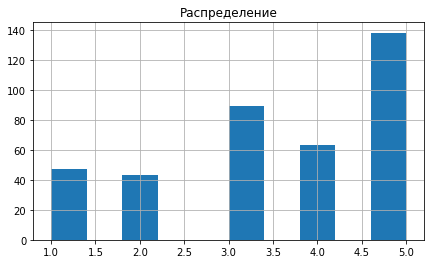

#### Обнаружены пропуски

Всего пропусков:  15 - 3.8 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
55,GP,F,16,U,GT3,A,2.0,1.0,other,other,other,mother,1.0,2.0,0.0,no,no,yes,yes,yes,yes,yes,yes,5.0,3.0,4.0,NaN,8.0,50.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
145,GP,F,15,U,GT3,T,1.0,1.0,NaN,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
153,GP,M,19,U,GT3,NaN,3.0,2.0,services,at_home,home,mother,1.0,1.0,NaN,no,yes,no,no,yes,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0


---

## absences

количество пропущенных занятий

#### Обнаружены выбросы

Найдены выбросы по IQR в количестве:  17

Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0


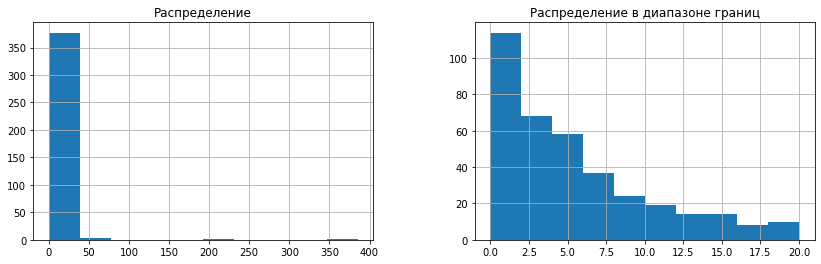

#### Обнаружены пропуски

Всего пропусков:  12 - 3.04 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0


---

## score

баллы по госэкзамену по математике

Выбросов нет


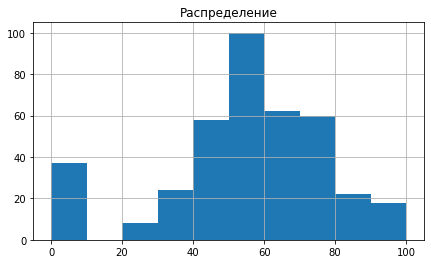

#### Обнаружены пропуски

Всего пропусков:  6 - 1.52 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN


---

In [9]:
# отбор числовых данных
stud_nums = stud.select_dtypes(include=['float64', 'int64'])

# в цикле для каждой колонки отобразит результаты
for col in list(stud_nums.columns):
    first_look(stud_nums, col)
    printmd('---')

### Выводы о числовых данных

В `'Fedu'` есть значение `40.0`, оно выходит за пределы допустимого. По логике, вероятнее всего это опечатка, должно быть число `4`, так что его можно исправить.

В `'famrel'` есть значение `-1.0` выходящее за пределы. Скорее всего это NaN, т.е. значение не было заполнено. Его можно предварительно очистить.

В `'absences'` обнаружено значительное количество выбросов. Нужно посмотреть отдельно.

В остальном, во многих колонках есть пропуски. Но так же есть пропуски в `'score'`, а эта колонка ключевая в датасете, без неё нельзя определить успеваемость учеников. Поэтому, данные с пропусками в этой колонке придётся удалить.

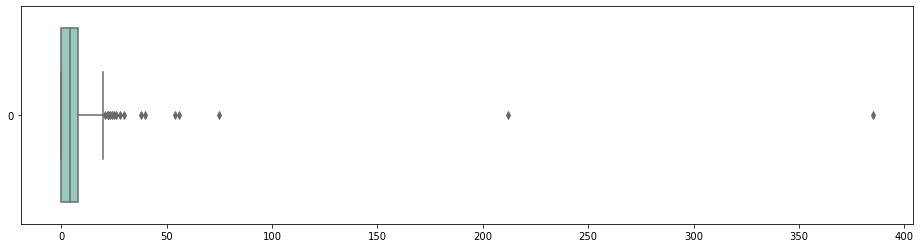

183     56.0
222    385.0
276     75.0
390    212.0
Name: absences, dtype: float64

In [10]:
# Отдельно посмотрим на Absences
plt.figure(figsize=(16, 4))
sns.boxplot(data=stud['absences'], orient="h", palette="Set3", whis=1.5)
plt.show()
stud[stud['absences'] > 55]['absences']

Как видим всего два значения свыше `200` выбиваются из общей массы. Лучше удалить их, чтобы они не мешались и не портили общую картину.

In [11]:
stud['Fedu'] = stud['Fedu'].replace(40, 4)
stud.famrel = stud.famrel.replace(-1, np.NaN)
stud.drop(stud[stud['absences'] > 200].index, inplace=True)
stud.dropna(subset=['score'], inplace=True)

#first_look(stud, 'score')

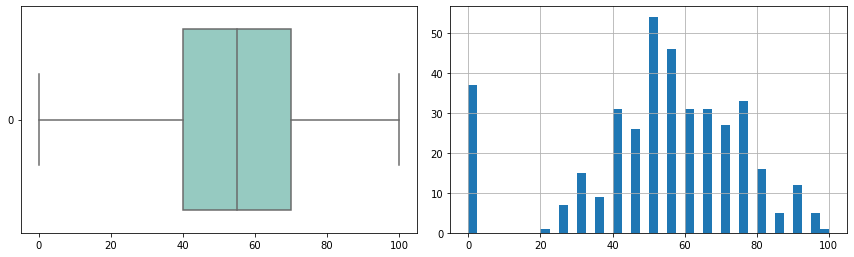

Выбросов нет


In [12]:
# Смотрим графики
fig, axes = plt.subplots(ncols=2, figsize=(6, 4))

sns.boxplot(data=stud['score'], orient="h",
                 palette="Set3", whis=1.5, ax=axes[0]);
stud.score.hist(bins=40, ax=axes[1])
fig.tight_layout(rect=[-1, 0.03, 1, 0.95])
plt.show()
search_mistakes(stud, 'score')

Почти 40 учеников получили 0 баллов. Как видно, распределение начинается с 20 баллов. Не станем гадать на кофейной гуще о системе баллов, там может быть что угодно, нам про это ничего не известно. В связи с этим, данные с нулевыми баллами не могут быть использованы в анализе, поэтому удалим их.

In [13]:
stud.drop(stud[stud['score'] == 0].index, inplace=True)

## score

баллы по госэкзамену по математике

Выбросов нет


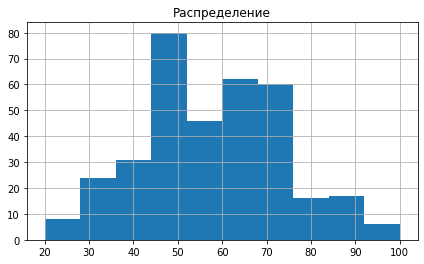

In [14]:
first_look(stud, 'score')

Соответственно, имеем диапазон баллов от самого низкого - 20, и самого высокого - 100. Что является более корректным и разумным в данном датасете.

## Анализ строковых данных

## school

аббревиатура школы, в которой учится ученик

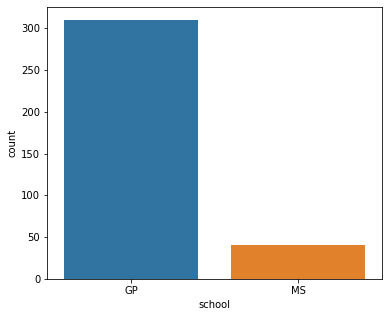

---

## sex

пол ученика (`'F'` - женский, `'M'` - мужской)

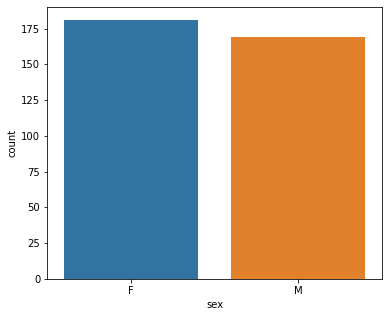

---

## address

тип адреса ученика (`'U'` - городской, `'R'` - за городом)

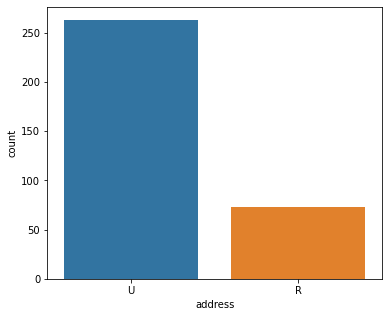

#### Обнаружены пропуски

Всего пропусков:  14 - 4.0 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0


---

## famsize

размер семьи(`'LE3'` <= 3, `'GT3'` > 3)

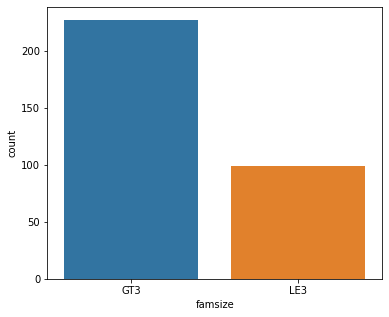

#### Обнаружены пропуски

Всего пропусков:  24 - 6.86 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
36,GP,M,15,U,NaN,T,4.0,3.0,teacher,services,home,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90.0
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0


---

## Pstatus

статус совместного жилья родителей (`'T'` - живут вместе, `'A'` - раздельно)

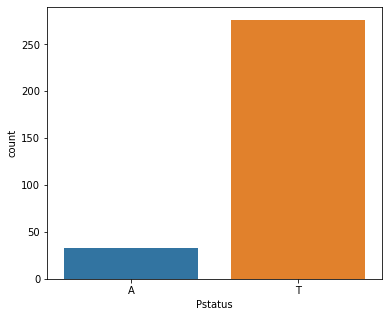

#### Обнаружены пропуски

Всего пропусков:  41 - 11.71 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
11,GP,F,15,U,GT3,NaN,2.0,4.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
15,GP,F,16,U,GT3,NaN,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,NaN,2.0,2.0,5.0,14.0,40.0


---

## Mjob

работа матери (`'teacher'` - учитель, `'health'` - сфера здравоохранения, `'services'` - гос служба, `'at_home'` - не работает, `'other'` - другое)

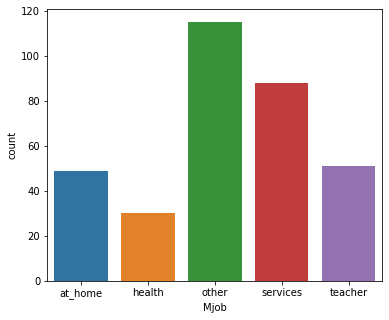

#### Обнаружены пропуски

Всего пропусков:  17 - 4.86 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
29,GP,M,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0


---

## Fjob

работа отца (`'teacher'` - учитель, `'health'` - сфера здравоохранения, `'services'` - гос служба, `'at_home'` - не работает, `'other'` - другое)

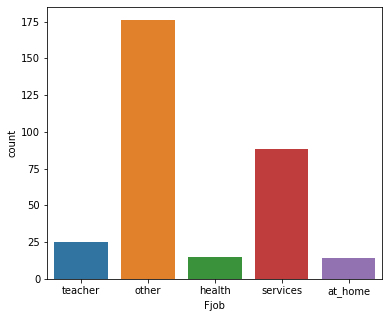

#### Обнаружены пропуски

Всего пропусков:  32 - 9.14 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,NaN,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0


---

## reason

причина выбора школы (`'home'` - близость к дому, `'reputation'` - репутация школы, `'course'` - образовательная программа, `'other'` - другое)

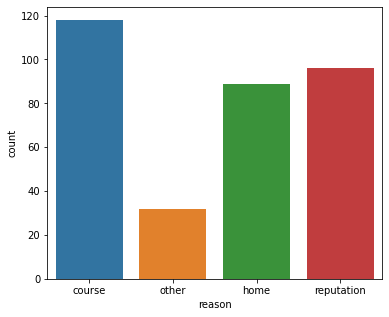

#### Обнаружены пропуски

Всего пропусков:  15 - 4.29 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,NaN,mother,1.0,2.0,0.0,no,NaN,no,yes,no,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
63,GP,F,16,U,GT3,NaN,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,NaN,mother,1.0,4.0,0.0,no,no,yes,no,yes,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0


---

## guardian

опекун (`'mother'` - мать, `'father'` - отец, `'other'` - другое)

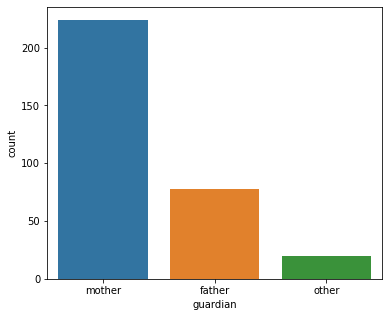

#### Обнаружены пропуски

Всего пропусков:  28 - 8.0 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,NaN,1.0,3.0,0.0,yes,NaN,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,NaN,1.0,1.0,0.0,no,yes,no,no,no,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,NaN,1.0,2.0,1.0,yes,yes,no,yes,no,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
53,GP,F,15,U,GT3,T,4.0,4.0,services,services,course,NaN,1.0,1.0,0.0,yes,yes,yes,no,yes,yes,yes,no,3.0,3.0,4.0,5.0,0.0,55.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0


---

## schoolsup

дополнительная образовательная поддержка (`yes` или `no`)

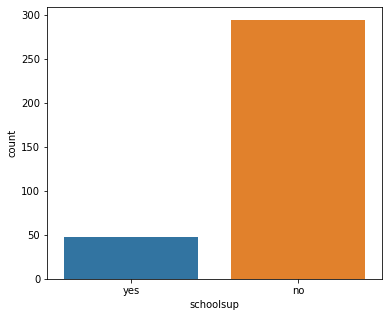

#### Обнаружены пропуски

Всего пропусков:  9 - 2.57 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,no,yes,no,yes,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
151,GP,M,16,U,LE3,T,2.0,1.0,at_home,NaN,course,mother,1.0,1.0,1.0,NaN,no,no,yes,yes,yes,no,yes,4.0,4.0,4.0,5.0,6.0,70.0
211,GP,M,17,U,LE3,T,4.0,4.0,services,other,home,mother,1.0,2.0,0.0,NaN,yes,yes,no,yes,yes,yes,yes,5.0,3.0,5.0,3.0,13.0,65.0


---

## famsup

семейная образовательная поддержка (`yes` или `no`)

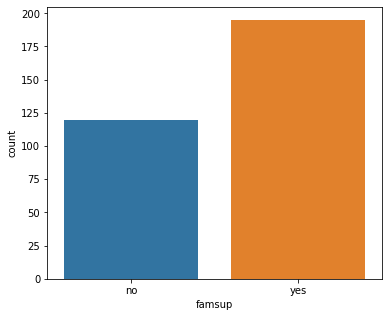

#### Обнаружены пропуски

Всего пропусков:  35 - 10.0 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
28,GP,M,16,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,NaN,mother,1.0,2.0,0.0,no,NaN,no,yes,no,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,NaN,1.0,3.0,0.0,yes,NaN,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0


---

## paid

дополнительные платные занятия по математике (`yes` или `no`)

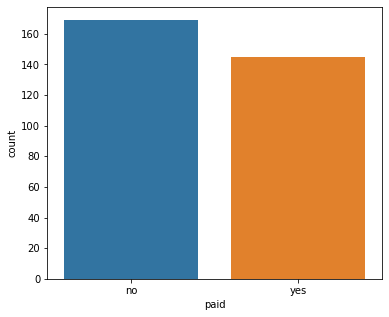

#### Обнаружены пропуски

Всего пропусков:  36 - 10.29 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,home,father,1.0,1.0,0.0,no,no,NaN,yes,yes,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0


---

## activities

дополнительные внеучебные занятия (`yes` или `no`)

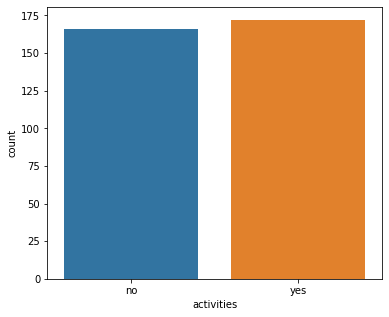

#### Обнаружены пропуски

Всего пропусков:  12 - 3.43 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
81,GP,M,15,U,GT3,NaN,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
99,GP,F,16,U,GT3,T,4.0,3.0,other,at_home,course,mother,1.0,3.0,0.0,yes,yes,yes,NaN,yes,yes,yes,no,5.0,3.0,5.0,3.0,0.0,40.0


---

## nursery

посещал детский сад (`yes` или `no`)

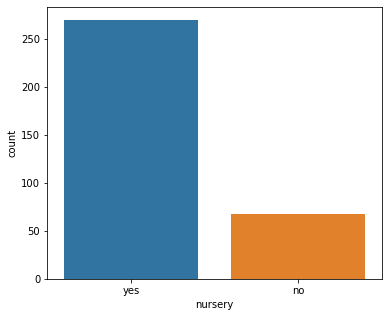

#### Обнаружены пропуски

Всего пропусков:  12 - 3.43 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
85,GP,F,15,U,GT3,T,4.0,4.0,services,services,reputation,father,2.0,2.0,2.0,no,no,yes,no,NaN,yes,yes,yes,4.0,4.0,4.0,5.0,6.0,40.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
152,GP,F,15,R,GT3,T,3.0,3.0,services,NaN,reputation,other,2.0,3.0,2.0,no,yes,yes,yes,NaN,yes,yes,yes,4.0,2.0,1.0,3.0,8.0,50.0


---

## higher

хочет получить высшее образование (`yes` или `no`)

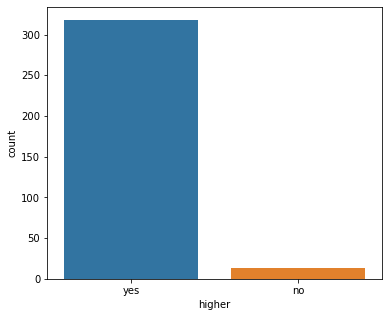

#### Обнаружены пропуски

Всего пропусков:  19 - 5.43 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
34,GP,M,16,U,GT3,T,3.0,2.0,other,other,home,mother,1.0,1.0,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,4.0,3.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
84,GP,F,15,U,GT3,T,1.0,1.0,other,other,home,father,1.0,2.0,0.0,no,yes,no,yes,no,NaN,yes,no,4.0,3.0,2.0,4.0,2.0,50.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0


---

## internet

наличие интернета дома (`yes` или `no`)

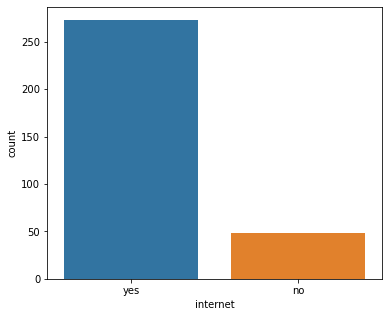

#### Обнаружены пропуски

Всего пропусков:  29 - 8.29 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
65,GP,F,16,U,LE3,T,4.0,3.0,teacher,services,course,mother,3.0,2.0,0.0,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,3.0,1.0,2.0,75.0
80,GP,M,15,U,GT3,T,2.0,3.0,other,services,course,father,1.0,1.0,0.0,yes,yes,yes,yes,no,yes,NaN,yes,3.0,2.0,2.0,3.0,2.0,60.0


---

## romantic

в романтических отношениях (`yes` или `no`)

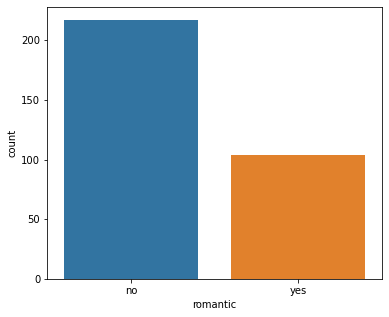

#### Обнаружены пропуски

Всего пропусков:  29 - 8.29 %
Первые 5:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
13,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,course,mother,2.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,NaN,5.0,4.0,3.0,3.0,2.0,55.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,no,yes,no,yes,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,NaN,1.0,1.0,0.0,no,yes,no,no,no,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0


---

In [15]:
# отбор строковых данных
stud_strs = stud.select_dtypes(include=['object'])

# в цикле для каждой колонки отобразит результаты
for col in list(stud_strs.columns):
    first_look(stud_strs, col)
    printmd('---')

# 3. Корреляционный анализ количественных признаков

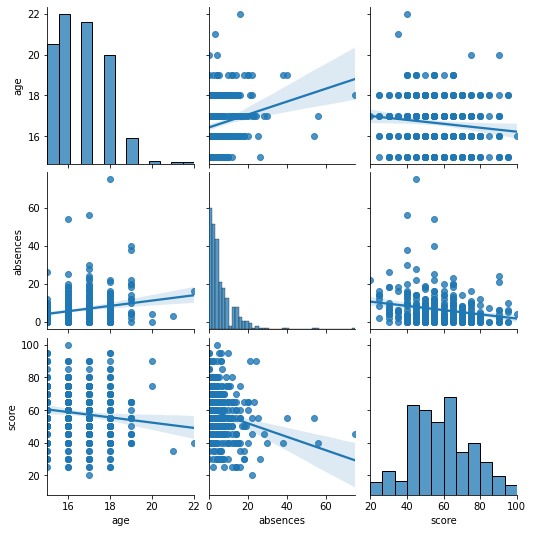

In [16]:
stud_num = ['age', 'absences', 'score']
sns.pairplot(stud[stud_num], kind='reg');

In [17]:
stud[stud_num].corr()

,age,absences,score
age,1.000000,0.211007,-0.125073
absences,0.211007,1.000000,-0.214926
score,-0.125073,-0.214926,1.000000


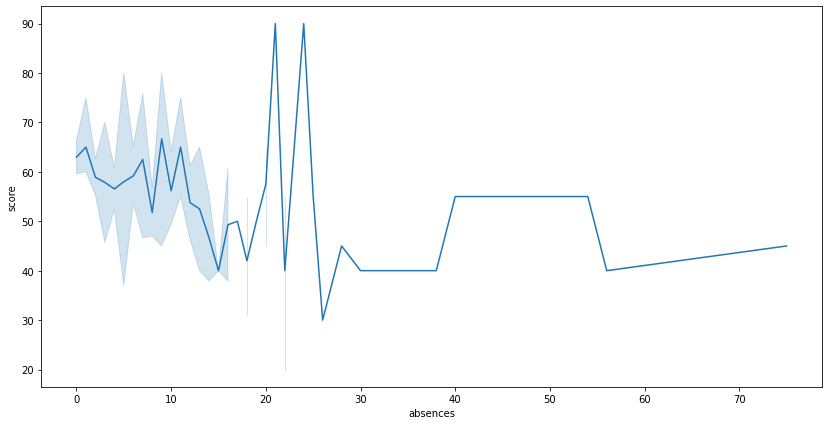

In [18]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=stud, x='absences', y='score');

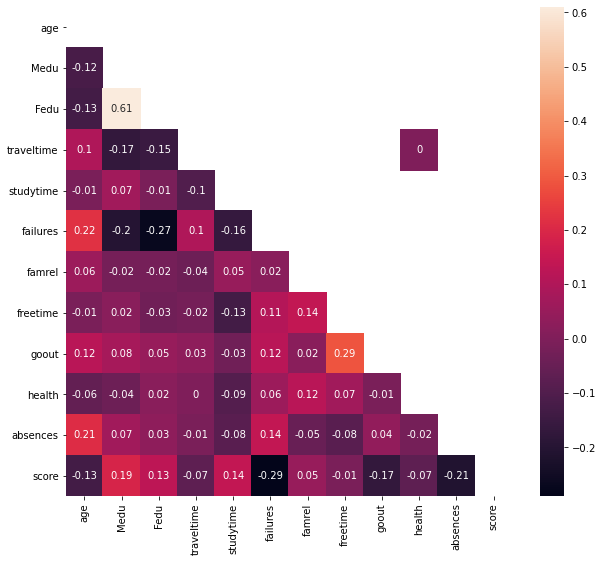

In [19]:
# Используем тепловую карту для удобства:
quantitative_features = stud.select_dtypes(include='number').columns
corr_matrix = stud[quantitative_features].corr().round(2)
plt.rcParams['figure.figsize'] = (10, 9)
matrix =  np.triu(corr_matrix)
x = sns.heatmap(corr_matrix, mask=matrix, annot=True)

# 4. Визуальный анализ номинативных признаков, оценка количества уникальных значений

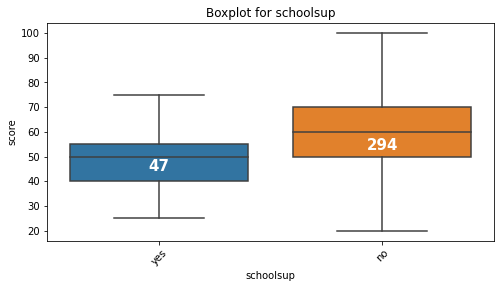

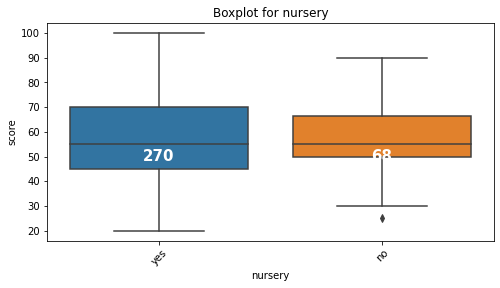

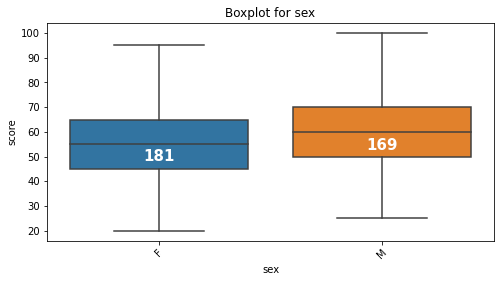

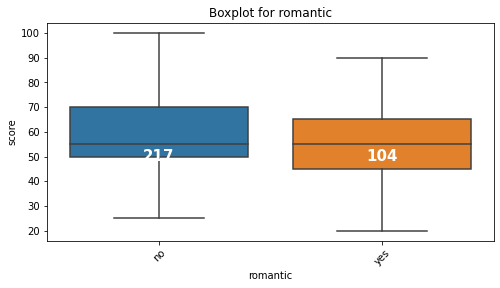

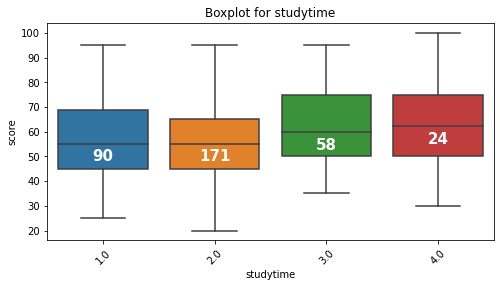

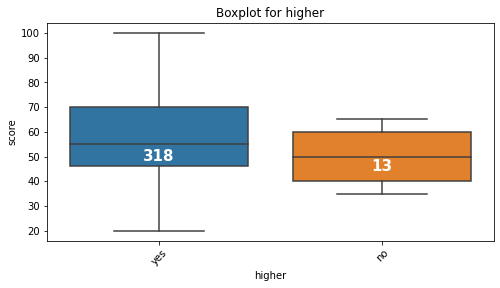

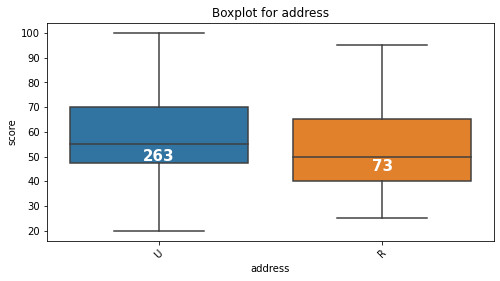

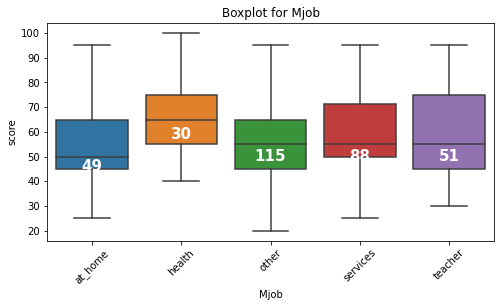

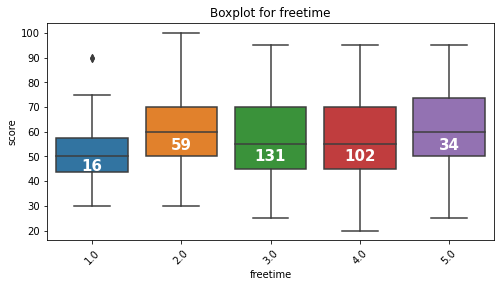

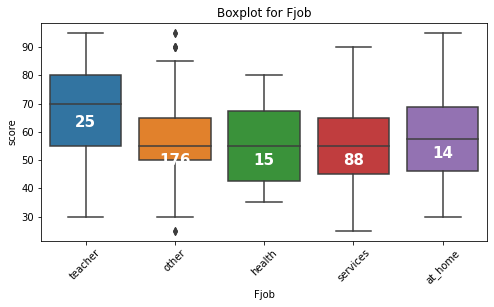

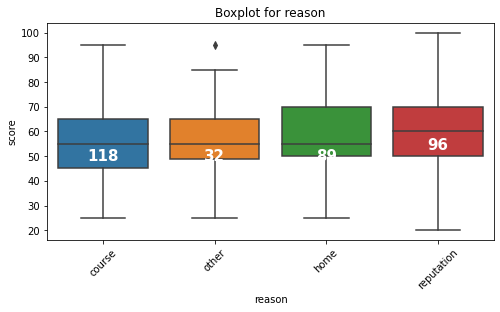

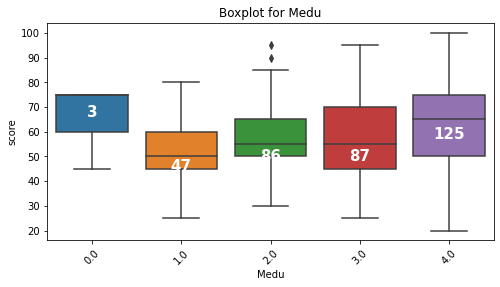

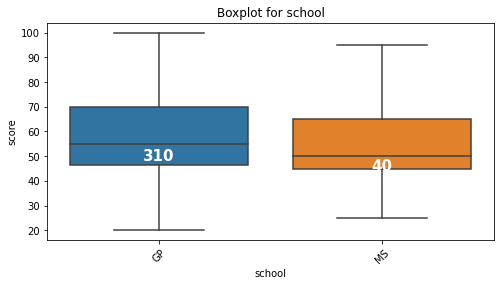

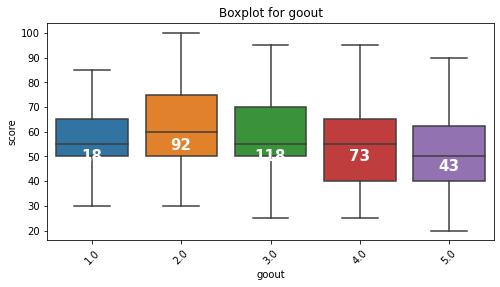

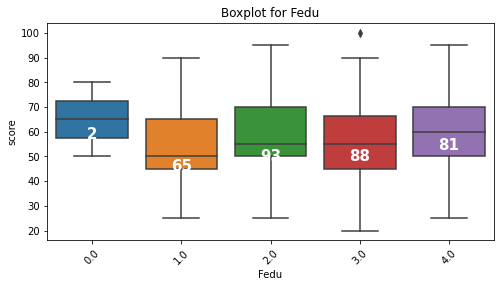

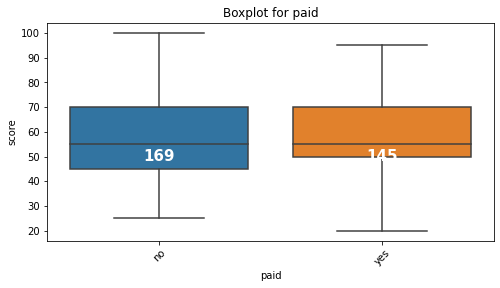

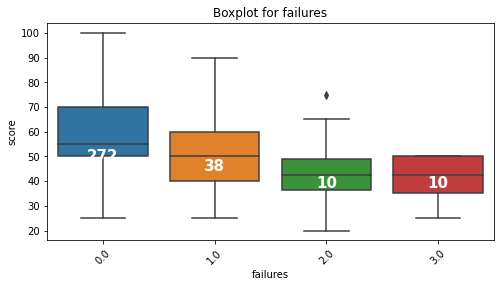

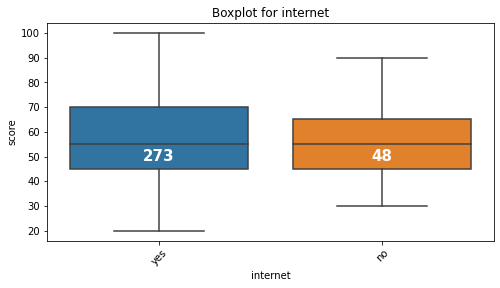

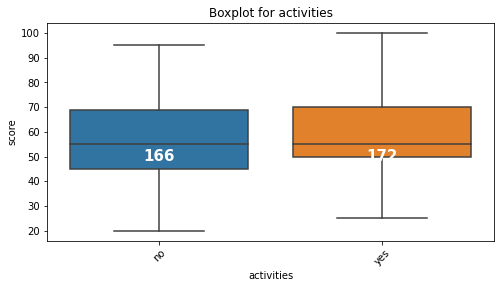

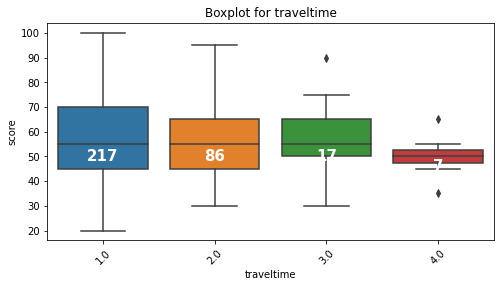

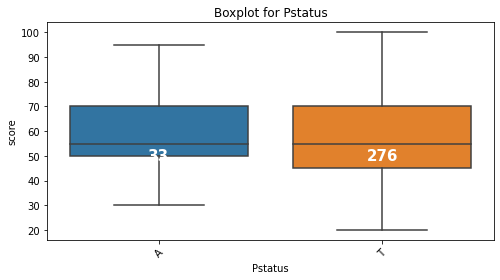

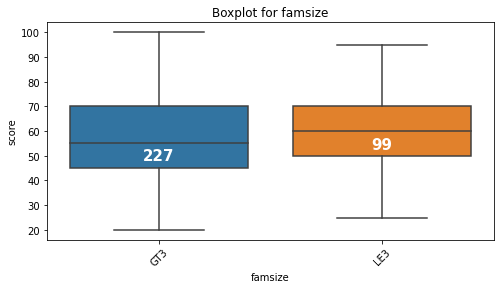

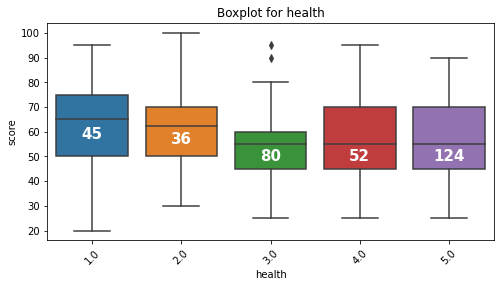

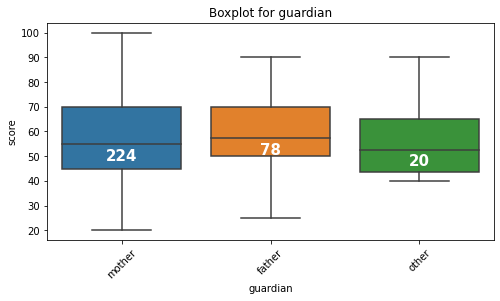

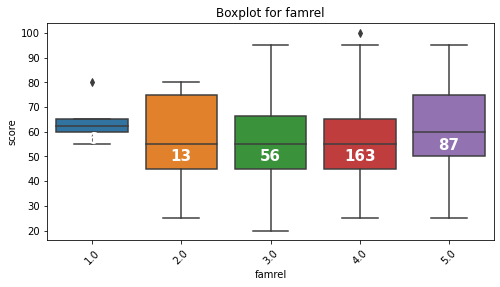

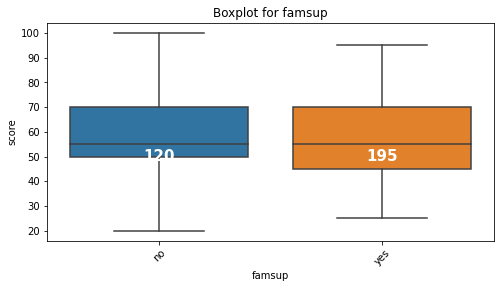

In [20]:
nom_cols = list(set(stud.columns) - set(['age', 'absences', 'score']))
for col in nom_cols:
    get_boxplot(stud, col)

# 5. Итоговый вывод

Дальше не вижу смысла продолжать, т.к. для этого нужно дополнительное соответствующее образование, нужно понимать какие инструменты использовать и что делать. На данном этапе обучения у меня нет понимания всего этого. И нет смысла делать визуальный анализ номинативных признаков.

На ознакомление с дополнительными необязательными модулями не хватило времени.

Могу только сказать, из полученной тепловой карты, что, наиболее всего на итоговый балл `'score'` влияет количество внеучебных неудач `'failures'`, а так же количество пропущенных занятий `'absences'`.

А так же отслеживается влияние образования обоих родителей `'Medu'` и `'Fedu'` на количество внеучебных неудач `'failures'`. И незначительно влияет время на учёбу помимо школы `'studytime'`.

Остальные "влияния" спорные.